In [4]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mplt
import os
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import f_oneway
from scipy.stats import normaltest
from scipy.stats import kruskal
from itertools import groupby

#set base path
path = r'C:\Users\jacks\Documents\UNM\P30\AIRWISE\PurpleAir Download 9-30-2024\Daily_data/'


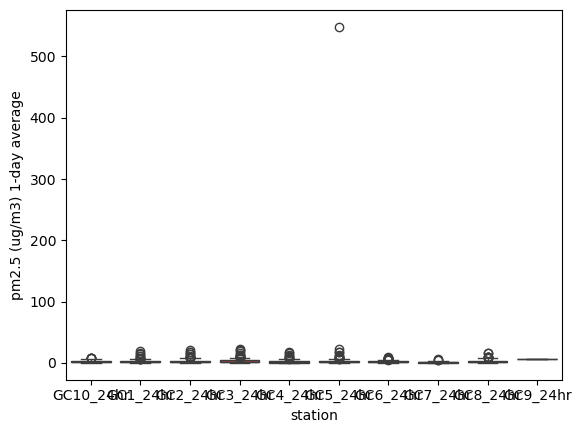

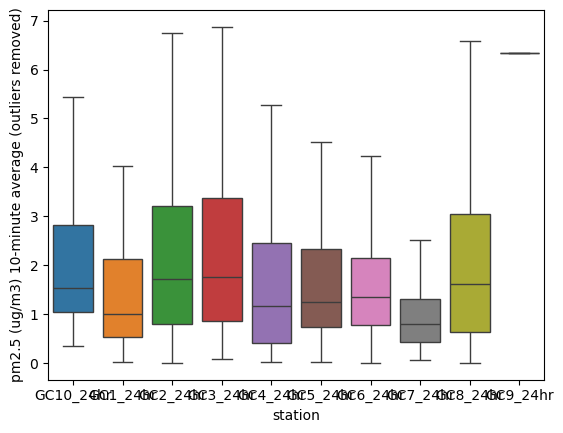

In [6]:
#create empty dict to hold station data
dfs = {}
dfs_or = {}
#dfsl = []

def drop_outliers_IQR(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return data[(data >= lower_bound) & (data <= upper_bound)]

#loop through station data CSVs
for root, dirs, files in os.walk(path):
    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            #define pm2.5 data as array, append to dict
            #Data_type = object
            dfa = np.array(df['pm2.5_atm'])
            dfa_or = drop_outliers_IQR(dfa)
            #dfsl.append(dfa)
            dfs[f'{file_name[:-4]}'] = dfa
            dfs_or[f'{file_name[:-4]}'] = dfa_or

            # s, p = normaltest(dfa, nan_policy='omit')
            # print('s value is: ' + str(s))
            # print('p value is: ' + str(p))

            # s_or, p_or = normaltest(dfa_or, nan_policy='omit')
            # print('s value is (outliers removed): ' + str(s_or))
            # print('p value is (outliers removed): ' + str(p_or))

#create boxplot
bpc = sb.boxplot(dfs, orient='v').set(xlabel='station', ylabel='pm2.5 (ug/m3) 1-day average')
plt.show()
bpc_or = sb.boxplot(dfs_or, orient='v', showfliers=False).set(xlabel='station', ylabel='pm2.5 (ug/m3) 10-minute average (outliers removed)')
plt.show()

          

In [7]:
ad = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dfs.items()]))
ad

,GC10_24hr,GC1_24hr,GC2_24hr,GC3_24hr,GC4_24hr,GC5_24hr,GC6_24hr,GC7_24hr,GC8_24hr,GC9_24hr
0,4.418165,0.061000,0.011373,0.087444,0.330469,0.707500,0.739198,4.697692,0.570000,6.339167
1,3.011486,0.020966,0.300382,0.347709,0.336399,0.588911,0.657013,1.092483,1.122580,NaN
2,1.239312,0.861347,0.134533,0.221562,0.032597,0.776046,0.892976,0.611938,0.625897,NaN
3,1.892549,0.158435,0.072946,0.152806,0.396866,1.004051,0.408313,0.092280,0.009520,NaN
4,1.360633,0.147625,0.413380,0.200339,0.576989,0.461326,0.010278,0.057014,0.061287,NaN
...,...,...,...,...,...,...,...,...,...,...
174,NaN,NaN,2.201903,1.663626,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,3.745396,2.904489,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,3.285174,3.125784,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,2.230794,2.364859,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ad_or = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dfs_or.items()]))
ad_or

,GC10_24hr,GC1_24hr,GC2_24hr,GC3_24hr,GC4_24hr,GC5_24hr,GC6_24hr,GC7_24hr,GC8_24hr,GC9_24hr
0,4.418165,0.061000,0.011373,0.087444,0.330469,0.707500,0.739198,1.092483,0.570000,6.339167
1,3.011486,0.020966,0.300382,0.347709,0.336399,0.588911,0.657013,0.611938,1.122580,NaN
2,1.239312,0.861347,0.134533,0.221562,0.032597,0.776046,0.892976,0.092280,0.625897,NaN
3,1.892549,0.158435,0.072946,0.152806,0.396866,1.004051,0.408313,0.057014,0.009520,NaN
4,1.360633,0.147625,0.413380,0.200339,0.576989,0.461326,0.010278,0.105542,0.061287,NaN
...,...,...,...,...,...,...,...,...,...,...
161,NaN,NaN,2.201903,2.904489,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,3.745396,3.125784,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,3.285174,2.364859,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,2.230794,2.709831,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ad.describe()

,GC10_24hr,GC1_24hr,GC2_24hr,GC3_24hr,GC4_24hr,GC5_24hr,GC6_24hr,GC7_24hr,GC8_24hr,GC9_24hr
count,61.000000,98.000000,179.000000,179.000000,93.000000,138.000000,117.000000,55.000000,170.000000,1.000000
mean,2.581309,2.401651,2.960330,3.203863,2.562834,6.589643,2.155667,1.175110,2.599048,6.339167
std,2.143126,3.353127,3.303786,3.659733,3.299918,46.590752,1.925017,1.153311,2.704296,NaN
min,0.356965,0.020966,0.011373,0.087444,0.032597,0.016921,0.010278,0.057014,0.009520,6.339167
25%,1.080536,0.585061,0.835030,0.882912,0.412174,0.758828,0.916954,0.437400,0.686143,6.339167
50%,1.734583,1.180689,1.906555,2.002014,1.566057,1.475829,1.490097,0.826727,1.679963,6.339167
75%,3.311551,2.581220,3.419922,3.784633,2.835023,2.933181,2.530237,1.573355,3.476984,6.339167
max,8.238361,18.725613,21.528511,22.528251,17.212165,548.473519,8.898686,5.719618,15.767364,6.339167


In [6]:
ad_or.describe()

,Crow_24hr,Hardin_24hr,Pryor_24hr,Wyola_24hr
count,56.000000,54.000000,59.000000,55.000000
mean,20.694686,17.980434,16.415576,16.753116
std,14.254707,12.483555,13.956462,13.418650
min,1.205833,0.024895,0.376843,0.086641
25%,6.059306,6.251056,3.412510,3.561444
50%,21.903832,18.610475,15.678096,16.870762
75%,26.945950,24.110255,24.200599,23.608068
max,56.477971,48.823524,52.732200,49.575376


In [7]:
outpath = r'C:\Users\jacks\Documents\UNM\P50\INBRE\PM_data\Output_tables/'
ad.to_csv(outpath + 'datacomb.csv')

In [8]:
ad_or.to_csv(outpath + 'datacomb_or.csv')

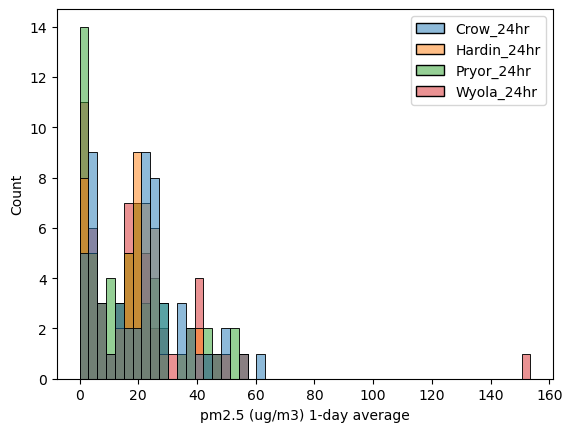

In [26]:
hpc = sb.histplot(ad, bins=16, binwidth=4).set(xlabel='pm2.5 (ug/m3) 1-day average')

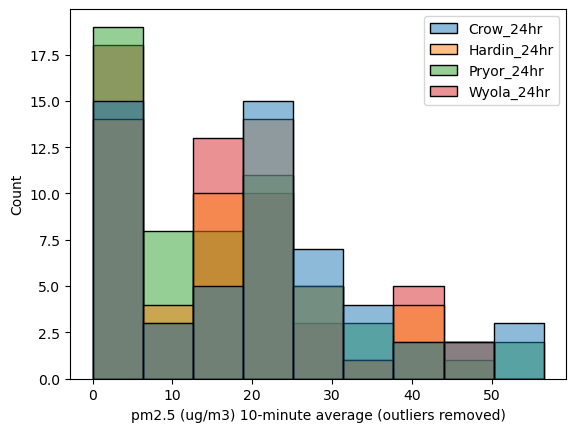

In [10]:
hpc_or = sb.histplot(ad_or).set(xlabel='pm2.5 (ug/m3) 10-minute average (outliers removed)')

In [11]:
adm = pd.melt(ad)
adm

,variable,value
0,Crow_24hr,1.205833
1,Crow_24hr,5.038183
2,Crow_24hr,1.797824
3,Crow_24hr,1.891245
4,Crow_24hr,1.574038
...,...,...
231,Wyola_24hr,9.733692
232,Wyola_24hr,5.995434
233,Wyola_24hr,1.765480
234,Wyola_24hr,NaN


In [12]:
adm_or = pd.melt(ad_or)
adm_or

,variable,value
0,Crow_24hr,1.205833
1,Crow_24hr,5.038183
2,Crow_24hr,1.797824
3,Crow_24hr,1.891245
4,Crow_24hr,1.574038
...,...,...
231,Wyola_24hr,1.765480
232,Wyola_24hr,NaN
233,Wyola_24hr,NaN
234,Wyola_24hr,NaN


In [13]:
adm_clean = adm.dropna()
adm_clean

,variable,value
0,Crow_24hr,1.205833
1,Crow_24hr,5.038183
2,Crow_24hr,1.797824
3,Crow_24hr,1.891245
4,Crow_24hr,1.574038
...,...,...
229,Wyola_24hr,18.043664
230,Wyola_24hr,18.602458
231,Wyola_24hr,9.733692
232,Wyola_24hr,5.995434


In [14]:
adm_clean_or = adm_or.dropna()
adm_clean_or

,variable,value
0,Crow_24hr,1.205833
1,Crow_24hr,5.038183
2,Crow_24hr,1.797824
3,Crow_24hr,1.891245
4,Crow_24hr,1.574038
...,...,...
227,Wyola_24hr,18.043664
228,Wyola_24hr,18.602458
229,Wyola_24hr,9.733692
230,Wyola_24hr,5.995434


In [15]:
adm_clean.to_csv(outpath + 'datacomb_melt.csv')

In [16]:
adm_clean_or.to_csv(outpath + 'datacomb_melt_or.csv')

In [17]:
result = adm_clean.groupby('variable')['value'].apply(list)
result

variable
Crow_24hr      [1.20583333333333, 5.03818309859155, 1.7978242...
Hardin_24hr    [0.0508673469387755, 0.024895251396648, 0.4729...
Pryor_24hr     [3.4388, 3.00869985141159, 0.820641748942172, ...
Wyola_24hr     [0.845161290322581, 3.46161764705882, 1.146582...
Name: value, dtype: object

In [18]:
result_or = adm_clean_or.groupby('variable')['value'].apply(list)
result_or

variable
Crow_24hr      [1.20583333333333, 5.03818309859155, 1.7978242...
Hardin_24hr    [0.0508673469387755, 0.024895251396648, 0.4729...
Pryor_24hr     [3.4388, 3.00869985141159, 0.820641748942172, ...
Wyola_24hr     [0.845161290322581, 3.46161764705882, 1.146582...
Name: value, dtype: object

In [19]:
F, p = f_oneway(*result)
print(F)
print(p)

0.9154590527716091
0.4341856130178484


In [20]:
H, p = kruskal(*result)
print(H)
print(p)

5.313263547167367
0.1502440513040995


In [21]:
F, p = f_oneway(*result_or)
print(F)
print(p)

1.159407056223056
0.3261410902647063


In [22]:
H, p = kruskal(*result_or)
print(H)
print(p)

5.298461950251294
0.15120222395421146
